In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import scipy.io



In [2]:
df1 = pd.read_excel('JPM Disposed.xlsx', skiprows = 1)
df2 = pd.read_excel('ML Disposed.xlsx', skiprows = 1)
df3 = pd.read_excel('BACM Disposed.xlsx', skiprows = 1)
df4 = pd.read_excel('SBM Disposed.xlsx', skiprows = 1)
df5 = pd.read_excel('CS Disposed.xlsx', skiprows = 1)
df5 = df5.drop(df5.columns[0],1)
mat_file= scipy.io.loadmat('LOSS.mat')
mat_file_pay = scipy.io.loadmat('PAY.mat')
#print(mat_file['LOSS'])
print(mat_file)

np_array = np.array(mat_file['LOSS'])
df6 = pd.DataFrame(np_array)
df6.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']
df6.insert(len(df6.columns),'Loss', 1)
df6.head()


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Jan 01 10:50:20 2018', '__version__': '1.0', '__globals__': [], 'LOSS': array([[6.97399000e+05, 1.35000000e+00, 6.94000000e+01, ...,
        1.43158123e-01, 1.27688166e-01, 5.00000000e+00],
       [1.08863800e+06, 1.36000000e+00, 6.13000000e+01, ...,
        3.10453300e-01, 2.42792748e-01, 2.10000000e+01],
       [6.18081000e+05, 1.31000000e+00, 6.60000000e+01, ...,
        1.10992426e-01, 1.01224195e-01, 2.00000000e+00],
       ...,
       [1.28823500e+06, 1.19810000e+00, 7.83858000e+01, ...,
        3.49308824e-01, 2.87741267e-01, 2.00000000e+00],
       [4.51543000e+05, 1.24880000e+00, 7.42306000e+01, ...,
        3.18033139e-01, 2.88972719e-01, 1.10000000e+01],
       [9.25922000e+05, 1.30180000e+00, 6.48609000e+01, ...,
        2.69554659e-01, 2.29872462e-01, 1.00000000e+00]])}


,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
0,697399.0,1.35,69.4,7250000.0,5.25,0.0312,5.2188,1998.0,100.0,22919.0,7.663725,351.880464,1.136903,4.144921,0.143158,0.127688,5.0,1
1,1088638.0,1.36,61.3,9100000.0,5.52,0.0312,5.4888,1984.0,95.4,23129.0,8.779339,463.441807,1.502204,4.144921,0.310453,0.242793,21.0,1
2,618081.0,1.31,66.0,6650000.0,5.45,0.0312,5.4188,2001.0,87.2,32504.0,7.358107,293.888839,1.076208,4.419219,0.110992,0.101224,2.0,1
3,260695.0,1.55,64.2,2600000.0,5.21,0.1112,5.0988,1965.0,100.0,32376.0,7.781940,353.971808,3.315033,4.242222,0.117658,0.080235,40.0,1
4,607133.0,1.26,65.8,6500000.0,5.29,0.0312,5.2588,1970.0,100.0,12942.0,7.404061,316.183875,2.961139,4.242222,0.274014,0.196397,4.0,1


In [4]:

df7 = pd.DataFrame(np.array(mat_file_pay['PAY']))
df7.columns = ['NOI','DSCR','LTV','Balance','Rate','Fee','Net Mortgage Rate','Year Built','Occupancy','ZipPop','CR','CS','CS Ratio','NOI Ratio','PV Ratio','IR','Renovation']
df7.insert(len(df7.columns),'Loss', 0)
df7.head()


,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
0,601087.0,1.73,41.8,5800000.0,5.19,0.0312,5.1588,1955.0,77.8,15149.0,5.231393,98.917029,0.358684,4.242222,0.423695,0.577329,4.0,0
1,352982.0,1.30,60.1,3200000.0,5.55,0.0812,5.4688,1986.0,100.0,24668.0,8.694138,445.191571,1.937487,4.242222,0.090875,0.066759,6.0,0
2,489518.0,1.87,36.9,3100000.0,5.39,0.0312,5.3588,1999.0,100.0,44813.0,6.993114,275.089206,0.997503,4.242222,0.345052,0.351724,6.0,0
3,464180.0,1.40,65.4,5100000.0,5.21,0.0712,5.1388,1978.0,84.6,32364.0,7.196589,295.436693,2.766837,4.242222,0.209496,0.154483,1.0,0
4,576244.0,1.26,61.5,6600000.0,5.16,0.0312,5.1288,1979.0,90.1,30491.0,6.332352,209.012943,1.957457,4.242222,0.260073,0.217952,26.0,0


In [93]:
data_clean = pd.concat([df6,df7], ignore_index = True)
data_clean.corr()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation,Loss
NOI,1.000000,0.122950,-0.015557,0.904979,-0.092564,-0.099187,-0.088382,-0.004661,-0.097906,-0.099355,-0.039261,-0.031610,-0.013732,-0.028327,0.941002,0.938568,-0.025669,-0.033794
DSCR,0.122950,1.000000,-0.400696,0.038571,-0.158859,-0.006513,-0.158908,-0.057814,-0.055856,-0.027073,0.062389,0.099111,0.028159,-0.132254,0.142474,0.162486,0.022581,-0.094803
LTV,-0.015557,-0.400696,1.000000,0.088660,0.072736,0.007184,0.074860,0.106693,0.035194,-0.018046,-0.037836,-0.072655,0.022562,0.125718,-0.018622,-0.033788,-0.051427,0.185997
Balance,0.904979,0.038571,0.088660,1.000000,-0.134484,-0.141188,-0.128766,-0.004555,-0.082617,-0.078491,-0.181428,-0.172316,-0.058362,-0.035737,0.842617,0.872621,-0.037524,-0.016545
Rate,-0.092564,-0.158859,0.072736,-0.134484,1.000000,0.265024,0.993967,-0.052757,0.016078,-0.027228,0.356323,0.143955,0.030534,0.775484,-0.087840,-0.111365,-0.041804,0.045590
Fee,-0.099187,-0.006513,0.007184,-0.141188,0.265024,1.000000,0.230023,0.022689,0.063613,-0.007794,0.264194,0.228534,-0.025352,0.133246,-0.085985,-0.085975,-0.002223,-0.020853
Net Mortgage Rate,-0.088382,-0.158908,0.074860,-0.128766,0.993967,0.230023,1.000000,-0.050146,0.014589,-0.025839,0.347239,0.135462,0.030513,0.773203,-0.084010,-0.107677,-0.040708,0.047168
Year Built,-0.004661,-0.057814,0.106693,-0.004555,-0.052757,0.022689,-0.050146,1.000000,-0.033207,0.086123,-0.028604,-0.018969,0.033025,-0.035368,-0.000924,-0.009677,-0.287432,0.010995
Occupancy,-0.097906,-0.055856,0.035194,-0.082617,0.016078,0.063613,0.014589,-0.033207,1.000000,0.071285,-0.074684,-0.095288,-0.083508,0.073618,-0.163542,-0.102381,0.072179,-0.045576
ZipPop,-0.099355,-0.027073,-0.018046,-0.078491,-0.027228,-0.007794,-0.025839,0.086123,0.071285,1.000000,-0.088917,-0.087453,0.005195,-0.006626,-0.097969,-0.088293,0.047940,-0.020596


<AxesSubplot:>

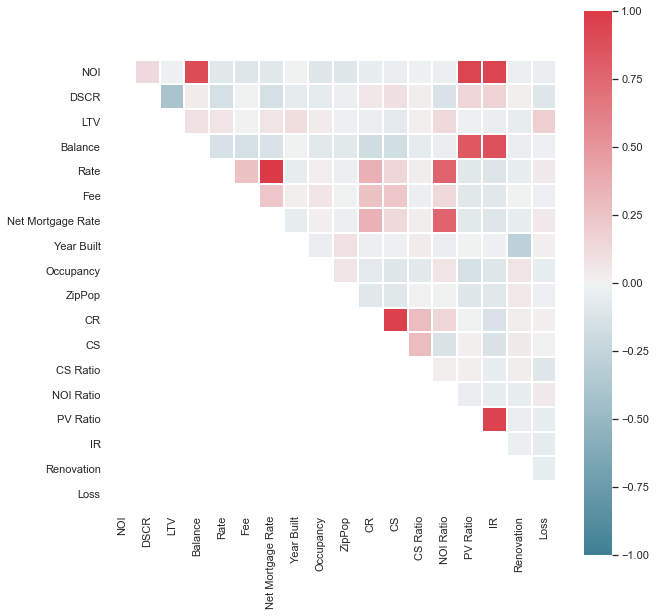

In [94]:
dataViz = data_clean
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

In [77]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

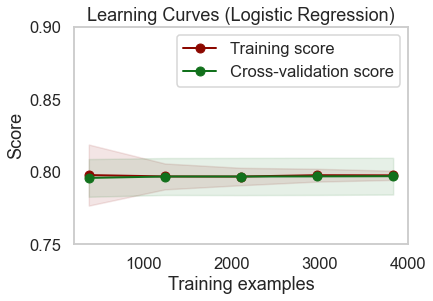

In [78]:
X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.75, 0.90), cv=cv, n_jobs=4)
plt.show()

In [79]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [80]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(data_clean, test_size = 0.2, random_state=42) #just for bootstrapping

In [82]:
X_train.head()

,NOI,DSCR,LTV,Balance,Rate,Fee,Net Mortgage Rate,Year Built,Occupancy,ZipPop,CR,CS,CS Ratio,NOI Ratio,PV Ratio,IR,Renovation
2649,159907.000000,1.220000,64.400000,1365000.0,7.540,0.09210,7.44790,1992.0,97.22,29697.0,8.528373,286.509208,1.242064,5.663281,0.080498,0.075274,9.0
1451,128168.000000,1.510000,62.000000,1060000.0,5.530,0.07110,5.45890,1969.0,100.00,36761.0,8.962797,470.092220,1.912402,4.261875,0.035798,0.025417,32.0
3329,571747.000000,1.330000,78.400000,5900000.0,5.570,0.02051,5.54949,1996.0,99.16,39765.0,7.597967,295.187303,3.062407,4.646094,0.144302,0.099105,11.0
1691,484978.909091,1.420000,67.600000,4160000.0,5.890,0.09240,5.79760,1985.0,96.10,34727.0,9.326517,562.432998,2.365338,3.702188,0.226214,0.147353,19.0
4305,262193.000000,1.196893,77.777778,2520000.0,6.195,0.04081,6.15419,1997.0,100.00,49635.0,8.092377,311.425154,2.528058,4.978125,0.066181,0.048442,9.0


In [83]:
#Recursive Feature Elimination

from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 5)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True False  True False False False  True False
 False False False  True False]
[10  1  3 12  1 13  1  7  4  9  1  8  2  5 11  1  6]


In [84]:
#Principal Component Analysis

from sklearn.decomposition import PCA 
pca = PCA(n_components=5, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [9.97625643e-01 2.37356255e-03 7.93947370e-07 9.13285806e-11
 1.25202879e-12]


In [91]:
X_train_features = X_train.loc[:,rfe.support_]
X_test_features = X_test.loc[:,rfe.support_]
data_clean_features = data_clean.loc[:,np.append(rfe.support_,True)]
print(X_train_features.shape)
print(data_clean_features.shape)

(3834, 5)
(4793, 6)


In [99]:
# RANDOM FOREST WITH RANDOMIZED SEARCH

from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)
results = rand.cv_results_
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)

RandomForestClassifier(max_features=1, random_state=0)


In [100]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

0.7778936392075079


In [107]:
print(results['mean_test_score'])
print(randomForest.feature_importances_)
print(len(maxFeatures))

[0.78843554 0.78780924 0.78843554 0.78300931 0.78196373 0.77987648
 0.77966728 0.78112952 0.77862387 0.77737256 0.77611908 0.77674539
 0.77528358 0.77173495 0.77361387 0.77424061]
[0.05917871 0.06337441 0.07080579 0.05948413 0.06042824 0.05937919
 0.06185828 0.05333793 0.04909529 0.05841574 0.05931428 0.0563472
 0.06773055 0.05196128 0.06003634 0.06053862 0.04871403]
16


Text(0, 0.5, 'Normalized Gini Importance')

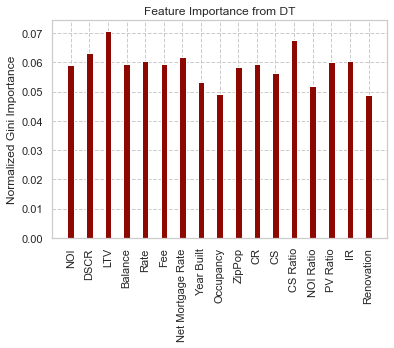

In [108]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(maxFeatures)+1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

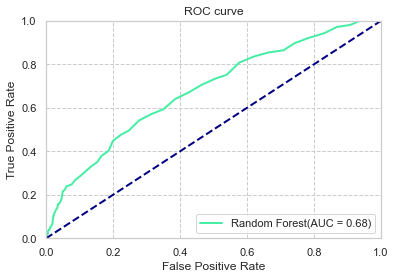

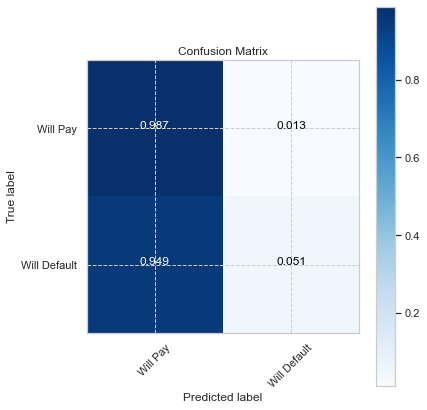

In [109]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()